# Rfam distribution from pre-computed RNAcentral sequences

Check statistics of Rfam families for pre-processed `sequence_and_dot_bracket.filtered.parquet`

In [2]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

DATASET_DIR = Path('./').resolve().parents[1] / 'datasets' / 'rna_central'

In [3]:
df = pd.read_parquet(DATASET_DIR / 'sequence_and_dot_bracket.filtered.parquet')

Number of sequences: 1,520,848
Number of Rfam families: 2810


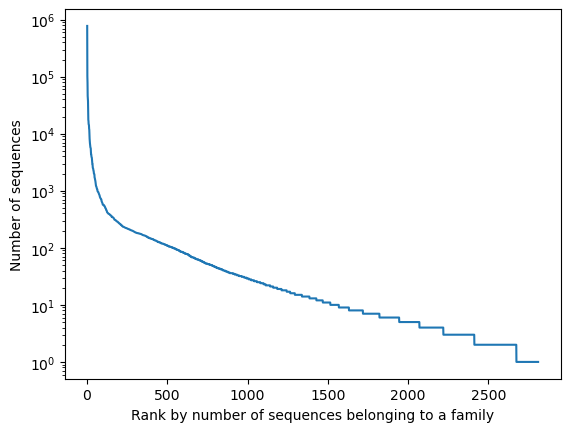

Number of families with more than 100 sequences: 533
Number of families with more than 50 sequences: 767

Top 20 families by number of sequences:
rfam_family
RF00005    777143
RF00001    101406
RF00163     79138
RF00097     46017
RF00026     39956
RF00017     37238
RF02543     23722
RF01960     17443
RF00177     16764
RF00100     14697
RF00004     14557
RF02541     13977
RF00174     12220
RF04021     11747
RF00059      9481
RF00003      8240
RF00019      7319
RF01787      6843
RF00023      6397
RF00015      6008

Bottom 20 families by number of sequences:
rfam_family
RF03613    1
RF04027    1
RF01650    1
RF00941    1
RF03294    1
RF01798    1
RF00761    1
RF02351    1
RF03768    1
RF04109    1
RF00061    1
RF01139    1
RF04217    1
RF01863    1
RF00858    1
RF03611    1
RF02518    1
RF01829    1
RF00848    1
RF03171    1


In [4]:
print(f'Number of sequences: {len(df):,}')
print(f'Number of Rfam families: {len(df["rfam_family"].unique())}')

rfam_counts = df['rfam_family'].value_counts()
sns.lineplot(x=np.arange(1, len(rfam_counts) + 1), y=rfam_counts)
plt.yscale('log')
plt.xlabel('Rank by number of sequences belonging to a family')
plt.ylabel('Number of sequences')
plt.show()

print(f'Number of families with more than 100 sequences: {sum(np.array(rfam_counts) > 100)}')
print(f'Number of families with more than 50 sequences: {sum(np.array(rfam_counts) > 50)}')
print()
print(f'Top 20 families by number of sequences:')
print(rfam_counts.head(20).to_string())
print()
print(f'Bottom 20 families by number of sequences:')
print(rfam_counts.tail(20).to_string())

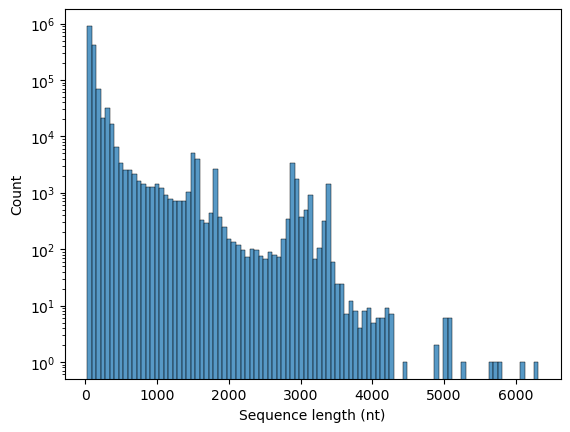

In [5]:
df['sequence_length'] = df['sequence'].str.len()
sns.histplot(df, x='sequence_length', bins=100)
plt.xlabel('Sequence length (nt)')
plt.yscale('log')
plt.show()